In [1]:
!pip install contractions

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from bs4 import BeautifulSoup

In [5]:
import re, string, unicodedata # import Regex, String and unicodedata
import contractions            # Import contractions library
from bs4 import BeautifulSoup  # Import BeautifulSoup


import numpy as np
import pandas as pd
import nltk                   ## Import Natural Language Tool-kit


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\212670291.HCAD\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\212670291.HCAD\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\212670291.HCAD\AppData\Roaming\nltk_data...


In [6]:
data = pd.read_csv(r'C:\Users\212670291.HCAD\OneDrive - GEHealthCare\Documents\Personal\Intellipaat\04. AI and DL IITR-17Nov2024-20250329T194636Z-001\04. AI and DL IITR-17Nov2024\Tweets.csv')

In [8]:
data.sample(2).T

,1991,6779
tweet_id,569488705146068993,570284840752427008
airline_sentiment,negative,negative
airline_sentiment_confidence,1.0,1.0
negativereason,longlines,Flight Booking Problems
negativereason_confidence,0.7057,0.6651
airline,United,Delta
airline_sentiment_gold,NaN,NaN
name,KP_DR_RAMOS,lizgottbrecht
negativereason_gold,NaN,NaN
retweet_count,0,0


## Identifying the missing values

In [9]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [10]:
data.isnull().sum()/len(data)*100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

## EDA - Exploratory Data Analysis

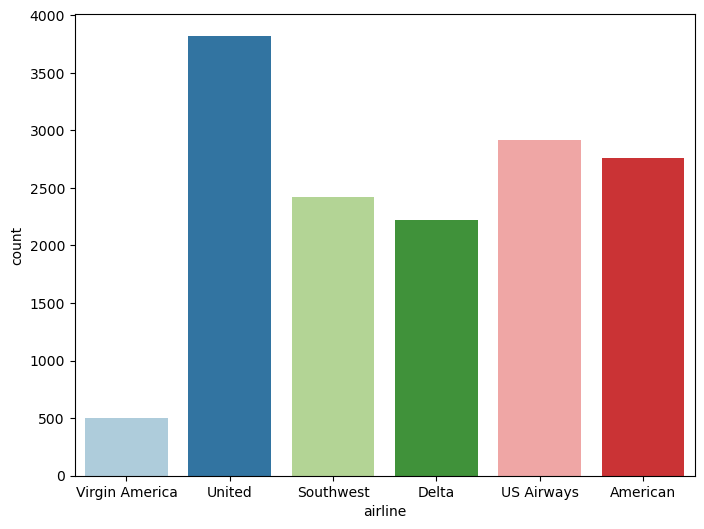

In [11]:
plt.subplots(figsize = (8,6))

sns.countplot(data = data, x='airline', palette = 'Paired')
plt.show()

In [12]:
print("Total number of tweets:", data['text'].count())

Total number of tweets: 14640


## Distribution of Sentiments across all the tweets

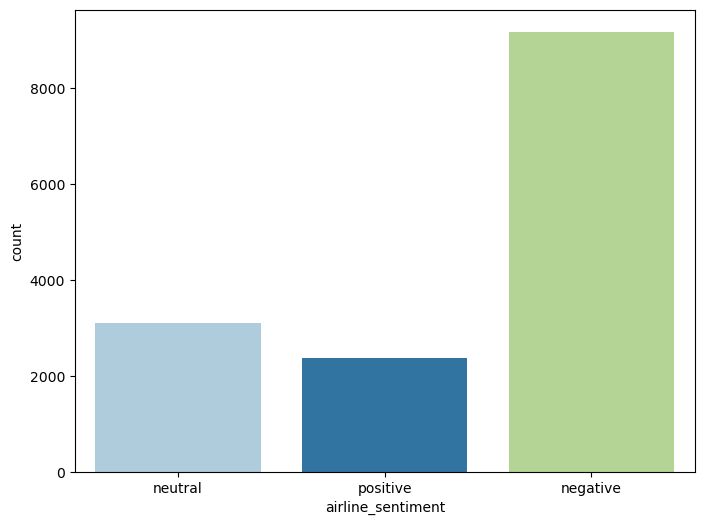

In [13]:
plt.subplots(figsize = (8,6))
sns.countplot(data = data, x='airline_sentiment', palette = 'Paired')
plt.show()

In [14]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [22]:
data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [25]:
airline_sentiment_grp = data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack().reset_index()

In [26]:
airline_sentiment_grp

airline_sentiment,airline,negative,neutral,positive
0,American,1960,463,336
1,Delta,955,723,544
2,Southwest,1186,664,570
3,US Airways,2263,381,269
4,United,2633,697,492
5,Virgin America,181,171,152


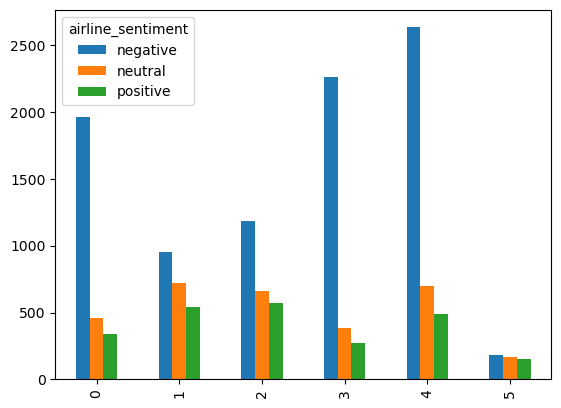

In [27]:
airline_sentiment_grp.plot(kind='bar')
plt.show()

### Let us deep dive on the `negative reasons`

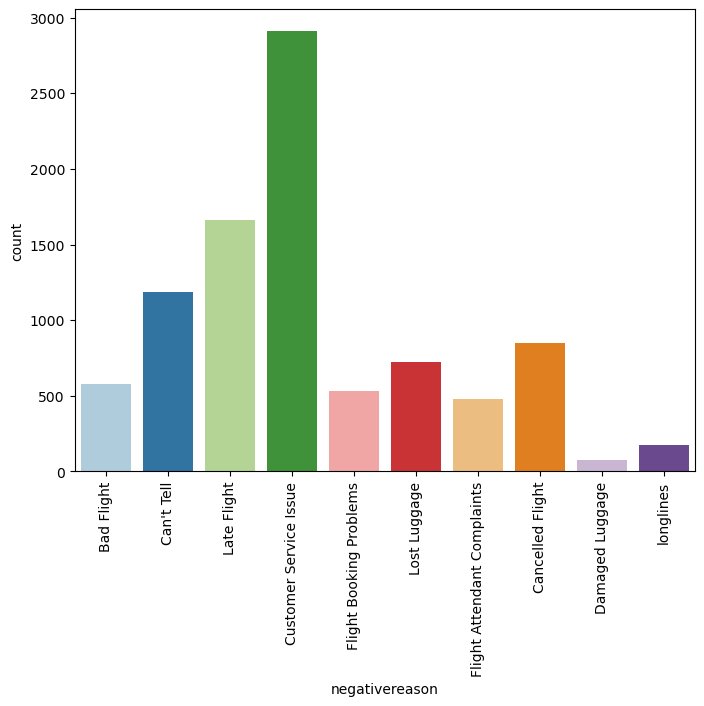

In [28]:
plt.subplots(figsize = (8,6))
sns.countplot(data = data, x='negativereason', palette = 'Paired')
### Rotate the x-ticks labels
plt.xticks(rotation = 90)
plt.show()

### Let us start with word cloud for negative tweets

In [31]:
! pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [32]:
from wordcloud import WordCloud,STOPWORDS

In [33]:
neg_df = data[data['airline_sentiment']=='negative'] #filtered for negative sentiments
words = ' '.join(neg_df['text']) # combines all the tweets (stored in the column 'text') into a single string where each tweet is joined with others' tweets

In [34]:
words

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse @VirginAmerica and it\'s a really big bad thing about it @VirginAmerica seriously would pay $30 a flight for seats that didn\'t have this playing.\nit\'s really the only bad thing about flying VA @VirginAmerica SFO-PDX schedule is still MIA. @VirginAmerica  I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! @VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select??? @VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet @VirginAmerica status match program.  I applied and it\'s been three weeks.  Called and emailed with no response. @VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be abl

In [35]:
cleaned_text = " ".join([word for word in words.split() #splitting the words string into indiviual words based on whitespace
                         if 'http' not in word #exclude any word that contains "http"
                         and not word.startswith('@') #exclude words which start with "@" symbol
                         and word != "RT" # excludes "RT"
                        ])

In [36]:
cleaned_text

'it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse and it\'s a really big bad thing about it seriously would pay $30 a flight for seats that didn\'t have this playing. it\'s really the only bad thing about flying VA SFO-PDX schedule is still MIA. I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! why are your first fares in May over three times more than other carriers when all seats are available to select??? you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet status match program. I applied and it\'s been three weeks. Called and emailed with no response. What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be able 2 eat anything for next 6 hrs #fail amazing to me that we can\'t get any cold air from the vents. #VX358 #noair #worstflightever #roasted

In [37]:
wordcloud = WordCloud(stopwords = STOPWORDS, #exclude common stopwords
                      background_color = 'white',
                      width = 3000,
                      height = 2500).generate(cleaned_text)

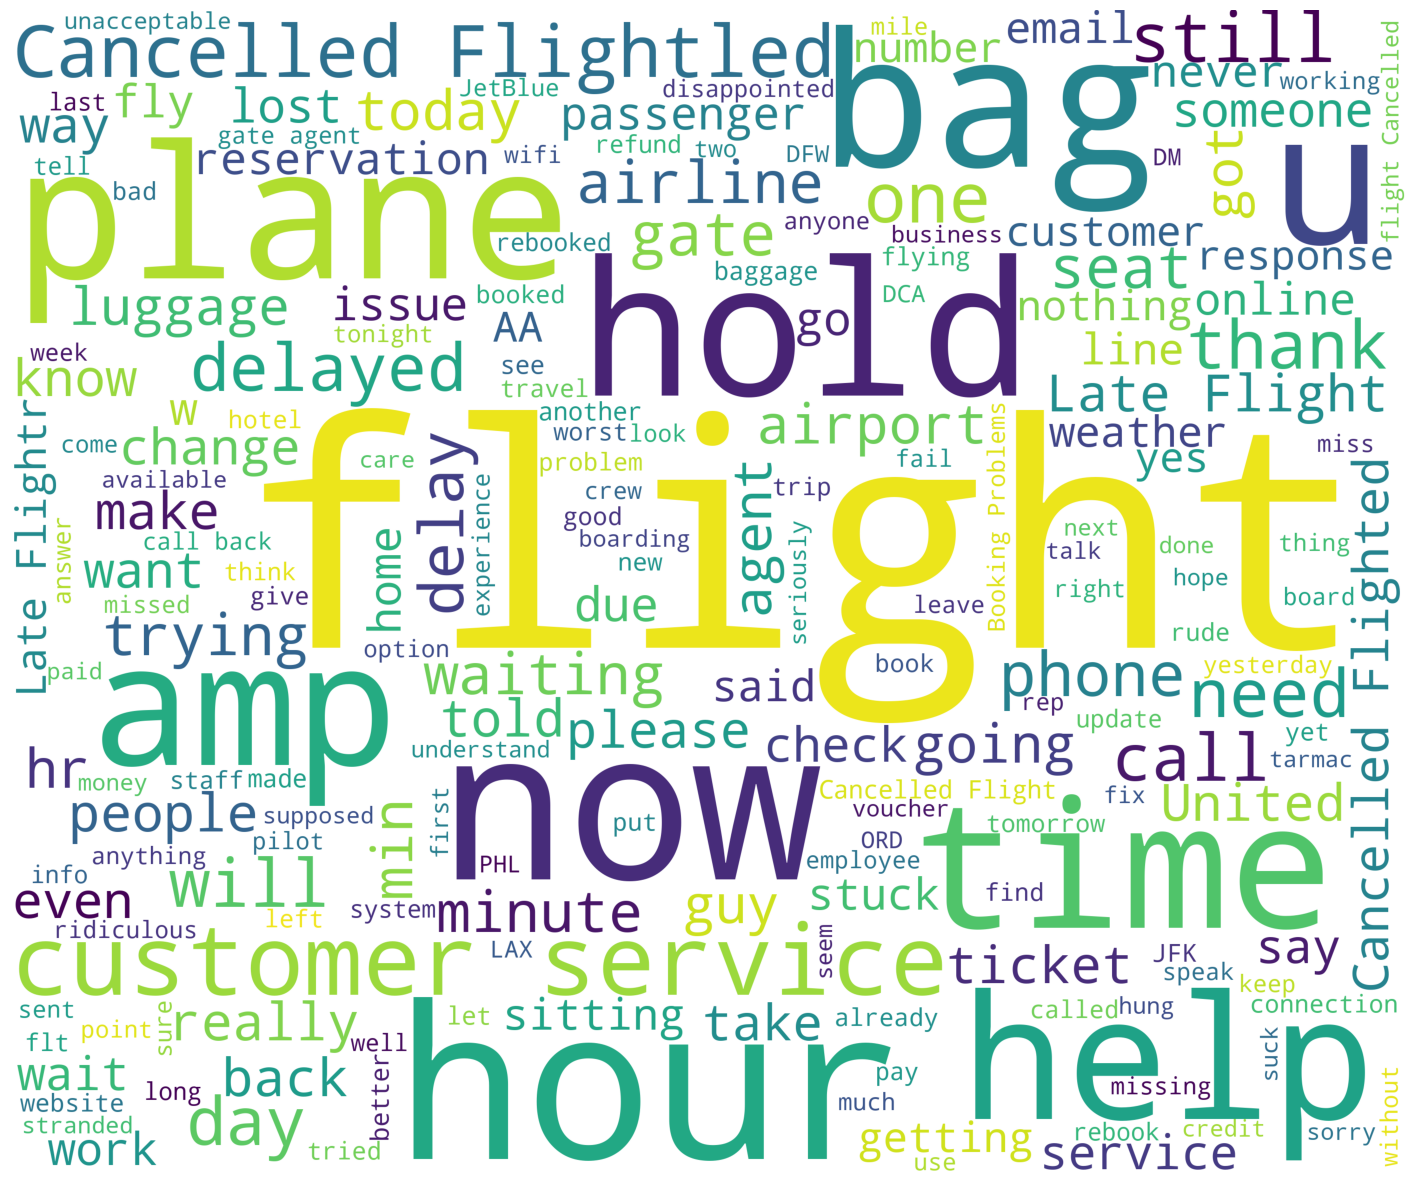

In [38]:
plt.subplots(figsize = (18,18))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Data Preprocessing Steps
- Remove html tags
- Replace contractions in strings (e.g., replace I'm --> I am)
- Remove numbers
- Tokenization
- To remove stopwords
- Lemmatized the data

In [39]:
data['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

### Remove html tags

In [40]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x:strip_html(x)) #lambda function takes the html tags and passes to strip_html function to remove the html tags

C:\Users\212670291.HCAD\AppData\Local\Temp\ipykernel_13592\1442181198.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [41]:
data['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

### Replace contractions in string (e.g., replace I'm --> I am)

In [42]:
def replace_contractions(text):

    '''
    replace contractions in the string
    
    '''
    return contractions.fix(text)

In [43]:
data['text'] = data['text'].apply(lambda x:replace_contractions(x))

In [44]:
data['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you have added commercials...
2        @VirginAmerica I did not today... Must mean I ...
3        @VirginAmerica it is really aggressive to blas...
4        @VirginAmerica and it is a really big bad thin...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 people so we need 2 kno...
Name: text, Length: 14640, dtype: object

### Remove Numbers

In [45]:
def remove_numbers(text):

    text = re.sub(r'\d+', '', text)
    return text

In [46]:
data['text'].tail(5)

14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 people so we need 2 kno...
Name: text, dtype: object

In [47]:
data['text'] = data['text'].apply(lambda x: remove_numbers(x))

In [48]:
data['text'].tail(5)

14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over  minutes Late Flight...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have  people so we need  know ...
Name: text, dtype: object

### Remove stropword(english)

In [49]:
stopwords = stopwords.words('english')

In [50]:
stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

### Below is the list of custom words which we want to keep

In [51]:
customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [52]:
stopwords = list(set(stopwords) - set(customlist))

In [53]:
stopwords

['to',
 "i've",
 'again',
 "they'd",
 've',
 'out',
 "it's",
 'yours',
 "i'm",
 'above',
 'himself',
 'its',
 'ain',
 'ours',
 'who',
 'into',
 'while',
 'about',
 'then',
 'between',
 'other',
 "they'll",
 'yourselves',
 'and',
 "they've",
 'what',
 'here',
 'after',
 'of',
 'same',
 'than',
 'a',
 'the',
 'are',
 'during',
 'is',
 'more',
 'do',
 'nor',
 "we'd",
 'm',
 'o',
 "should've",
 'y',
 'most',
 'or',
 'itself',
 'further',
 'being',
 'was',
 'did',
 'we',
 "he'd",
 'ourselves',
 'don',
 't',
 'can',
 'both',
 'my',
 'those',
 'any',
 'no',
 'off',
 'against',
 'so',
 's',
 "we've",
 "you've",
 'below',
 "you're",
 'this',
 'by',
 'had',
 'doing',
 'with',
 "i'd",
 'should',
 "aren't",
 'until',
 "you'll",
 'have',
 'yourself',
 'now',
 'i',
 'be',
 'herself',
 'such',
 'they',
 "they're",
 'because',
 'which',
 'why',
 'hers',
 'there',
 "we're",
 "it'd",
 'll',
 'few',
 'that',
 'if',
 'only',
 "we'll",
 'you',
 'some',
 'down',
 'his',
 'up',
 'in',
 'these',
 'themselves'

In [54]:
def remove_stopwords(words):
    '''
    remove stopwords using the list of tokenized words
    '''
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

In [55]:
def remove_punctuation(words):

    '''
    remove punctuation from the list of tokenized words
    
    '''
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [56]:
def to_lowercase(words):
    '''
    convert all characters to lowercase from the list of tokenized words

    '''
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

### TOKENIZATION, LEMMATIZATION & WORD2VEC ---> MODEL BUILDING

In [57]:
data['text'].sample(5).tolist()

['@AmericanAir ok makes no sense though Since you will give me a free upgrade to first.',
 '@AmericanAir served the nastiest food I Have ever seen yesterday.Rubber chicken in slime. The ENTIRE cabin sent their food back.FAs can confirm',
 '@AmericanAir yep, they moved me to A as they showed me flying "standby"',
 '@USAirways why would you board people on a plane before its their turn to de-ice? Why would you have people then wait through the hour long process?',
 '@AmericanAir - thanks. She submitted a damaged bag complaint online...is there anything else we can do? #goodcustomerservice']

In [58]:
import nltk
nltk.download('punkt_tab') # to download the tokenizer models
# nltk.download('all')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\212670291.HCAD\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [59]:
sample_text = " Hello! How are you doing today?"
print(sample_text)

 Hello! How are you doing today?


In [60]:
tokens = word_tokenize(sample_text)

In [61]:
tokens

['Hello', '!', 'How', 'are', 'you', 'doing', 'today', '?']

In [62]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
    --------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
pycaret 3.3.2 requires numpy<1.27,>=1.21, but you have numpy 2.2.5 which is incompatible.
sktime 0.26.0 requires numpy<1.27,>=1.21, but you have numpy 2.2.5 which is incompatible.
tensorflow-intel 2.15.0 requires numpy<2.0.0,>=1.23.5, but

In [63]:
import spacy
nlp = spacy.load("en_core_web_sm") # small-sized english language model

ImportError: cannot import name 'TypeAliasType' from 'typing_extensions' (C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\typing_extensions.py)

In [64]:
sample_text = " Hello! How are you doing today? I hope you're doing well."
print(sample_text)

 Hello! How are you doing today? I hope you're doing well.


In [65]:
sentences = sent_tokenize(sample_text)

In [66]:
sentences

[' Hello!', 'How are you doing today?', "I hope you're doing well."]

### LEMMATIZATION

In [67]:
from nltk.stem import WordNetLemmatizer # Used to perform lemmatization
from nltk.corpus import wordnet

nltk.download('wordnet') # NLTK resource for lemmatization
nltk.download('omw-1.4') #Open Multilingual Wordnet

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\212670291.HCAD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\212670291.HCAD\AppData\Roaming\nltk_data...


True

In [75]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\212670291.HCAD\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [68]:
### Initialize the lemmatizer
lemmatizer = WordNetLemmatizer() # creates an instance of WordnetLemmatizer

In [69]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN) #default to NOUN

In [72]:
### Example words 
words = ["running", "quickly", "better", "cats", "putting", "went", "making", "distracting", "studying"]

In [73]:
words

['running',
 'quickly',
 'better',
 'cats',
 'putting',
 'went',
 'making',
 'distracting',
 'studying']

In [76]:
### Lemmatization with POS tagging

for word in words:
    lemma = lemmatizer.lemmatize(word, get_wordnet_pos(word))
    print(f"Original: {word} -> Lemmatized: {lemma}")

Original: running -> Lemmatized: run
Original: quickly -> Lemmatized: quickly
Original: better -> Lemmatized: well
Original: cats -> Lemmatized: cat
Original: putting -> Lemmatized: put
Original: went -> Lemmatized: go
Original: making -> Lemmatized: make
Original: distracting -> Lemmatized: distract
Original: studying -> Lemmatized: study


In [77]:
nltk.pos_tag(["running"])

[('running', 'VBG')]

## Vectorization - convert text data to numbers

In [79]:
from sklearn.feature_extraction.text import CountVectorizer # to convert a collection of text docs into a matrix of token counts

In [80]:
### Example text data

texts = [
    " I love machine learning", 
    "Machine learning learning is fun",
    "I enjoy learning"]

In [81]:
### Initialize CountVectorizer

count_vec = CountVectorizer(max_features=100) #set the max number of parameters to 100
### fit and transform the text data
data_features_2 = count_vec.fit_transform(texts)

In [82]:
print(data_features_2)

  (0, 4)	1
  (0, 5)	1
  (0, 3)	1
  (1, 5)	1
  (1, 3)	2
  (1, 2)	1
  (1, 1)	1
  (2, 3)	1
  (2, 0)	1


In [83]:
data_features_2_array = data_features_2.toarray()

In [84]:
### Output the results
print("Vacabulary:", count_vec.get_feature_names_out())
print("Data Features Array: \n", data_features_2_array)

Vacabulary: ['enjoy' 'fun' 'is' 'learning' 'love' 'machine']
Data Features Array: 
 [[0 0 0 1 1 1]
 [0 1 1 2 0 1]
 [1 0 0 1 0 0]]


## Combined function to chain all the above functions

In [85]:
import pandas as pd
import unicodedata
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

# Load Stopwords (as a list to match your function structure)
stopwords_list = stopwords.words('english')  # Using list format for compatibility

### **1️⃣ Function to Map NLTK POS to WordNet POS**
def get_wordnet_pos(word):
    """Convert NLTK POS tag to WordNet format for better lemmatization."""
    tag = nltk.pos_tag([word])[0][1][0].upper()  # Get first letter of POS tag
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # Default to NOUN

### **2️⃣ Text Preprocessing Functions**
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all words to lowercase"""
    new_words = []
    for word in words:
        new_words.append(word.lower())
    return new_words

def remove_punctuation(words):
    """Remove punctuation from words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

### **3️⃣ Using Your Stopword Removal Function**
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords_list:  # Uses stopwords_list instead of an undefined variable
            new_words.append(word)
    return new_words

### **4️⃣ Lemmatization with POS Tagging**
def lemmatize_list(words):
    """Lemmatize words with correct POS tagging"""
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, get_wordnet_pos(word)))
    return new_words

### **5️⃣ Full Normalization Pipeline**
def normalize(text):
    """Complete text preprocessing pipeline"""
    words = text.split()  # Tokenize text into words
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)  # Uses POS tagging
    return ' '.join(words)

# Apply the function to text column
data['text'] = data['text'].apply(normalize)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\212670291.HCAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\212670291.HCAD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\212670291.HCAD\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [86]:
data['text'].tail(5)

14635       americanair thank get different flight chicago
14636    americanair leave minute late flight warning c...
14637    americanair please bring american airline blac...
14638    americanair money change flight answer phone s...
14639    americanair people need know many seat next fl...
Name: text, dtype: object

In [87]:
### Let us get the vocabulary
Count_vec = CountVectorizer(max_features=5000) #keeping only 5000 features as more number of features might increase the processing time
data_features = Count_vec.fit_transform(data['text'])

In [88]:
data_features = data_features.toarray()

In [89]:
data_features.shape

(14640, 5000)

In [90]:
print("Vocabulary:", Count_vec.get_feature_names_out().tolist())

Vocabulary: ['aa', 'aaba', 'aadfw', 'aadv', 'aadvantage', 'aafail', 'aal', 'aano', 'aarp', 'ab', 'abandon', 'abc', 'abcnetwork', 'ability', 'able', 'aboard', 'abq', 'abroad', 'absolute', 'absolutely', 'absurd', 'abuse', 'abysmal', 'ac', 'accept', 'acceptable', 'accepted', 'access', 'accident', 'accidentally', 'accommodate', 'accommodation', 'accomplish', 'accord', 'accordingly', 'account', 'accountability', 'accrue', 'accts', 'accurate', 'accuse', 'achieve', 'acknowledge', 'acknowledgement', 'acknowledgment', 'acquire', 'acquisition', 'across', 'act', 'action', 'activate', 'active', 'activitiesprevention', 'activity', 'actual', 'actually', 'ad', 'adam', 'add', 'addition', 'additional', 'addl', 'address', 'addtl', 'adjacent', 'adjustment', 'admiral', 'admit', 'adopt', 'adore', 'adult', 'advance', 'advantage', 'advertise', 'advertising', 'advice', 'advise', 'advisory', 'aerojobmarket', 'affect', 'affected', 'affiliate', 'afford', 'affordable', 'afraid', 'afterall', 'afternoon', 'age', 'a

In [91]:
len(Count_vec.get_feature_names_out().tolist())

5000

In [92]:
X = data_features #training features
y = data.airline_sentiment #training target

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

### Using RandomForest to build the model for the classification of tweets (sentiments classification)

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [96]:
rf = RandomForestClassifier(n_estimators=10, n_jobs=6)

'''
n_estimators = 10 --> specifies the numbers of trees in the forest
n_jobs = 6 --> upto 6 CPU cores will be used to parallelize the computation, which speeds up the training process
'''

### Training the model
rf_trained = rf.fit(X_train, y_train)

In [97]:
print(rf)

RandomForestClassifier(n_estimators=10, n_jobs=6)


In [103]:
print(np.mean(cross_val_score(rf, X_train, y_train,cv =5)))

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\joblib\externals\loky\process_executor.py", line 391, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\multiprocessing\queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\sklearn\__init__.py", line 87, in <module>
    from .base import clone
  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 19, in <module>
    from .utils import _IS_32BIT
  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\__init__.py", line 16, in <module>
    from scipy.sparse import issparse
  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\scipy\sparse\__init__.py", line 274, in <module>
    from ._csr import *
  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\scipy\sparse\_csr.py", line 11, in <module>
    from ._sparsetools import (csr_tocsc, csr_tobsr, csr_count_blocks,
ImportError: numpy.core.multiarray failed to import
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py", line 489, in fit
    trees = Parallel(
            ^^^^^^^^^
  File "C:\Users\212670291.HCAD\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\parallel.py", line 67, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\joblib\parallel.py", line 1098, in __call__
    self.retrieve()
  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\joblib\parallel.py", line 975, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\site-packages\joblib\_parallel_backends.py", line 567, in wrap_future_result
    return future.result(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\concurrent\futures\_base.py", line 456, in result
    return self.__get_result()
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Apps\AnacondaPro_311\v3_11_x64\Local\Lib\concurrent\futures\_base.py", line 401, in __get_result
    raise self._exception
joblib.externals.loky.process_executor.BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.


In [99]:
print(rf_trained.score(X_test, y_test))

0.7477231329690346
